# Préambule

On se propose dans ce TP d'illustrer certains techniques **d'apprentissage semi-supervisé** vues en cours.

Dans tout ce qui suit, on considère que l'on dispose d'un ensemble de données $x_{lab}$ labellisées et d'un ensemble de donnés $x_{unlab}$ non labellisées.

## Datasets

Commencez par exécuter ces codes qui vos permettront de charger les datasets que nous allons utiliser et de les partager en données labellisées et non labellisées, ainsi qu'en données de test.

### Dataset des deux clusters

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250):
  num_samples = num_lab + num_unlab + num_test
  # Génération de 1000 données du dataset des 2 lunes
  x, y = datasets.make_blobs(n_samples=[round(num_samples/2), round(num_samples/2)], n_features=2, center_box=(- 3, 3), random_state=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=num_test/num_samples, random_state=1)
  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=num_unlab/(num_unlab+num_lab), random_state=6)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test



(10, 2) (740, 2) (250, 2)
(10,) (740,) (250,)


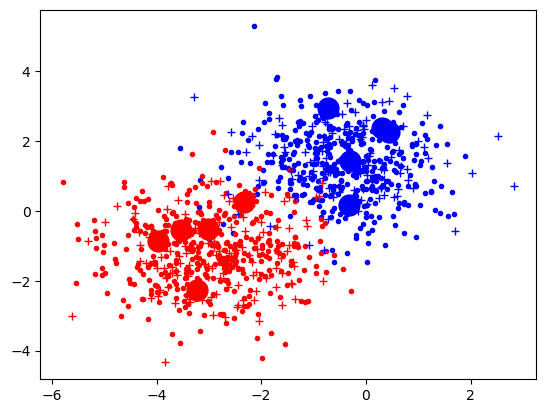

In [2]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

### Dataset des 2 lunes


<img src="https://drive.google.com/uc?id=1xb_gasBJ6sEmbyvCWTnVEAsbspyDCyFL">
<caption><center> Figure 1: Comparaison de différents algorithmes semi-supervisés sur le dataset des 2 lunes</center></caption>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250):
  num_samples = num_lab + num_unlab + num_test
  # Génération de 1000 données du dataset des 2 lunes
  x, y = datasets.make_moons(n_samples=num_samples, noise=0.1, random_state=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=num_test/num_samples, random_state=1)
  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=num_unlab/(num_unlab+num_lab), random_state=6)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test



(10, 2) (740, 2) (250, 2)
(10,) (740,) (250,)


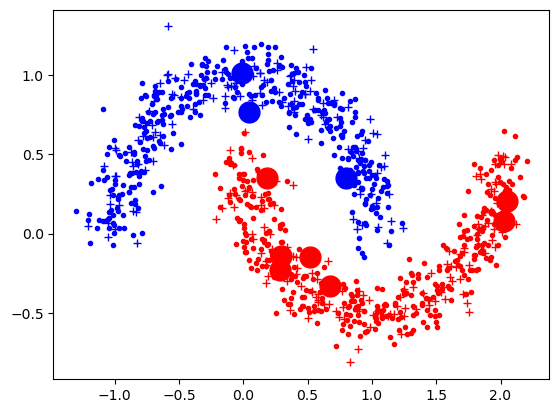

In [4]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

### MNIST


In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

def generate_mnist_dataset(num_lab = 10):

  # Chargement et normalisation (entre 0 et 1) des données de la base de données MNIST
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = np.expand_dims(x_train.astype('float32') / 255., 3)
  x_test = np.expand_dims(x_test.astype('float32') / 255., 3)

  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=(x_train.shape[0]-num_lab)/x_train.shape[0], random_state=2)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test


2024-10-04 09:58:13.224164: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 09:58:13.228965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 09:58:13.279172: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 09:58:13.279220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 09:58:13.279270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [6]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_mnist_dataset(num_lab = 10)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

(10, 28, 28, 1) (59990, 28, 28, 1) (10000, 28, 28, 1)
(10,) (59990,) (10000,)


## Modèles

Nous allons dès maintenant préparer les modèles que nous utiliserons dans la suite, à vous de les compléter :

In [17]:
from tensorflow.keras.layers import *
from tensorflow.keras import Model, Input
# A COMPLETER
# Ici, écrire un simple perceptron monocouche
def create_model_2clusters():

  inputs = Input(shape=(2,))

  outputs = Dense(1, activation='sigmoid')(inputs)

  model = Model(inputs=inputs, outputs=outputs)

  return model

In [18]:
# A COMPLETER
# Ici, écrire un perceptron multi-couches à une seule couche cachée comprenant 20 neurones
def create_model_2moons():

  inputs = keras.Input(shape=(2,))
  x = Dense(20, activation='relu')(inputs)

  outputs = Dense(1, activation='sigmoid')(x)
  
  model = keras.Model(inputs=inputs, outputs=outputs)

  return model

In [19]:
# A COMPLETER
# Ici, on implémentera le modèle LeNet-5 :
# 1 couche de convolution 5x5 à 6 filtres suivie d'un max pooling
# puis 1 couche de convolution 5x5 à 16 filtres suivie d'un max pooling et d'un Flatten
# Enfin 2 couches denses de 120 et 84 neurones, avant la couche de sortie à 10 neurones.
def create_model_mnist():

  inputs = keras.Input(shape=(28, 28, 1))
  x = Conv2D(6, kernel_size=(5, 5), activation='relu')(inputs)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Flatten()(x)
  x = Dense(120, activation='relu')(x)
  x = Dense(84, activation='relu')(x)

  outputs = Dense(10, activation='softmax')(x)

  model = keras.Model(inputs=inputs, outputs=outputs)

  return model

# Apprentissage supervisé

Commencez par bien lire le code ci-dessous, qui vous permet de mettre en place un apprentissage supervisé en détaillant la boucle d'apprentissage. Cela nous permettra d'avoir plus de contrôle dans la suite pour implémenter les algorithmes semi-supervisés.

Cela vous fournira également une base contre laquelle comparer les algorithmes semi-supervisés.

### Dataset des 2 clusters

In [20]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2clusters()

# Hyperparamètres de l'apprentissage
epochs = 150
batch_size = 16
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_state()
  test_acc_metric.reset_state()

Epoch    0 : Loss : 1.7877, Acc : 0.1000, Test Acc : 0.1680
Epoch    1 : Loss : 1.7619, Acc : 0.1000, Test Acc : 0.1680
Epoch    2 : Loss : 1.7363, Acc : 0.1000, Test Acc : 0.1680
Epoch    3 : Loss : 1.7107, Acc : 0.1000, Test Acc : 0.1640
Epoch    4 : Loss : 1.6853, Acc : 0.1000, Test Acc : 0.1600
Epoch    5 : Loss : 1.6600, Acc : 0.1000, Test Acc : 0.1600
Epoch    6 : Loss : 1.6349, Acc : 0.1000, Test Acc : 0.1560
Epoch    7 : Loss : 1.6099, Acc : 0.1000, Test Acc : 0.1520
Epoch    8 : Loss : 1.5850, Acc : 0.1000, Test Acc : 0.1480
Epoch    9 : Loss : 1.5603, Acc : 0.1000, Test Acc : 0.1480
Epoch   10 : Loss : 1.5358, Acc : 0.1000, Test Acc : 0.1480
Epoch   11 : Loss : 1.5114, Acc : 0.1000, Test Acc : 0.1440
Epoch   12 : Loss : 1.4873, Acc : 0.1000, Test Acc : 0.1440
Epoch   13 : Loss : 1.4633, Acc : 0.1000, Test Acc : 0.1400
Epoch   14 : Loss : 1.4395, Acc : 0.0000, Test Acc : 0.1360
Epoch   15 : Loss : 1.4159, Acc : 0.0000, Test Acc : 0.1320
Epoch   16 : Loss : 1.3926, Acc : 0.0000

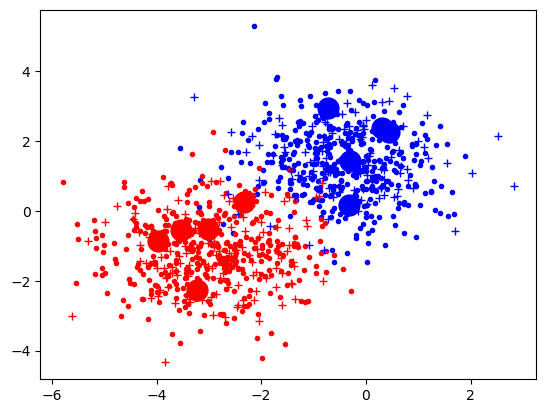

9600/9600 [==============================] - 16s 2ms/step


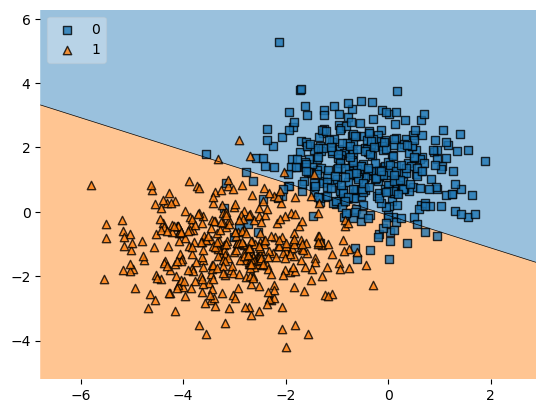

In [22]:
from mlxtend.plotting import plot_decision_regions

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

### Dataset des 2 lunes

Remettez en place le même apprentissage pour le dataset des 2 lunes.

In [38]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2moons()

# Hyperparamètres de l'apprentissage
epochs = 150
batch_size = 16
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_state()
  test_acc_metric.reset_state()

Epoch    0 : Loss : 0.7245, Acc : 0.4000, Test Acc : 0.6320
Epoch    1 : Loss : 0.6867, Acc : 0.7000, Test Acc : 0.7080
Epoch    2 : Loss : 0.6514, Acc : 0.7000, Test Acc : 0.7720
Epoch    3 : Loss : 0.6195, Acc : 0.9000, Test Acc : 0.8000
Epoch    4 : Loss : 0.5909, Acc : 0.9000, Test Acc : 0.7720
Epoch    5 : Loss : 0.5650, Acc : 0.9000, Test Acc : 0.7800
Epoch    6 : Loss : 0.5415, Acc : 0.9000, Test Acc : 0.7840
Epoch    7 : Loss : 0.5205, Acc : 0.9000, Test Acc : 0.8000
Epoch    8 : Loss : 0.5024, Acc : 0.9000, Test Acc : 0.8120
Epoch    9 : Loss : 0.4864, Acc : 0.9000, Test Acc : 0.8120
Epoch   10 : Loss : 0.4722, Acc : 0.9000, Test Acc : 0.8080
Epoch   11 : Loss : 0.4595, Acc : 0.9000, Test Acc : 0.8160
Epoch   12 : Loss : 0.4480, Acc : 0.9000, Test Acc : 0.8240
Epoch   13 : Loss : 0.4375, Acc : 0.9000, Test Acc : 0.8240
Epoch   14 : Loss : 0.4277, Acc : 0.9000, Test Acc : 0.8320
Epoch   15 : Loss : 0.4185, Acc : 0.9000, Test Acc : 0.8400
Epoch   16 : Loss : 0.4096, Acc : 0.9000

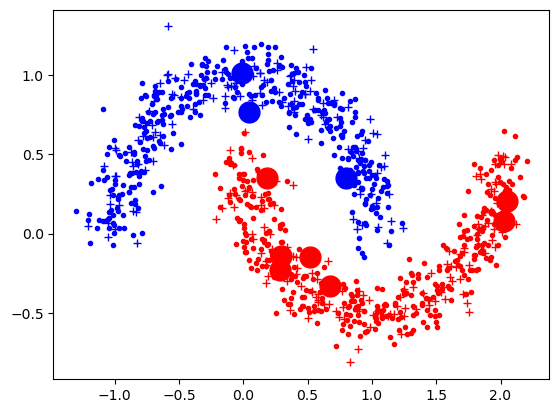

9600/9600 [==============================] - 17s 2ms/step


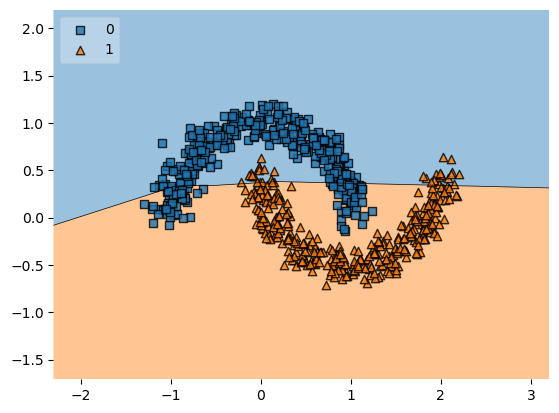

In [39]:
# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

# Minimisation de l'entropie

Nous allons dans cette partie mettre en place le mécanisme de minimisation d'entropie, conjointement à la minimisation de l'entropie croisée.

Pour commencer, implémentez la fonction de coût qui calcule l'entropie des prédictions du réseau $y_{pred}$

In [23]:
import tensorflow as tf

# Calcul de l'entropie de y_pred
# A COMPLETER
def entropy_loss(y_pred):
    return -tf.reduce_mean(y_pred * tf.math.log(y_pred))

**Travail à faire :** Reprenez maintenant la boucle d'apprentissage supervisé et introduisez la minimisation d'entropie pour régulariser l'apprentissage.

In [32]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2moons()

# Hyperparamètres de l'apprentissage
epochs = 150
batch_size = 16
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred) + entropy_loss(y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_state()
  test_acc_metric.reset_state()

Epoch    0 : Loss : 0.9469, Acc : 0.7000, Test Acc : 0.5120
Epoch    1 : Loss : 0.9214, Acc : 0.7000, Test Acc : 0.5120
Epoch    2 : Loss : 0.8971, Acc : 0.7000, Test Acc : 0.5120
Epoch    3 : Loss : 0.8739, Acc : 0.7000, Test Acc : 0.5120
Epoch    4 : Loss : 0.8520, Acc : 0.7000, Test Acc : 0.5120
Epoch    5 : Loss : 0.8311, Acc : 0.7000, Test Acc : 0.5120
Epoch    6 : Loss : 0.8115, Acc : 0.7000, Test Acc : 0.5120
Epoch    7 : Loss : 0.7928, Acc : 0.7000, Test Acc : 0.5120
Epoch    8 : Loss : 0.7748, Acc : 0.7000, Test Acc : 0.5120
Epoch    9 : Loss : 0.7576, Acc : 0.7000, Test Acc : 0.5120
Epoch   10 : Loss : 0.7412, Acc : 0.7000, Test Acc : 0.5120
Epoch   11 : Loss : 0.7258, Acc : 0.7000, Test Acc : 0.5120
Epoch   12 : Loss : 0.7113, Acc : 0.7000, Test Acc : 0.5120
Epoch   13 : Loss : 0.6982, Acc : 0.7000, Test Acc : 0.5120
Epoch   14 : Loss : 0.6863, Acc : 0.7000, Test Acc : 0.5120
Epoch   15 : Loss : 0.6753, Acc : 0.7000, Test Acc : 0.5120
Epoch   16 : Loss : 0.6649, Acc : 0.7000

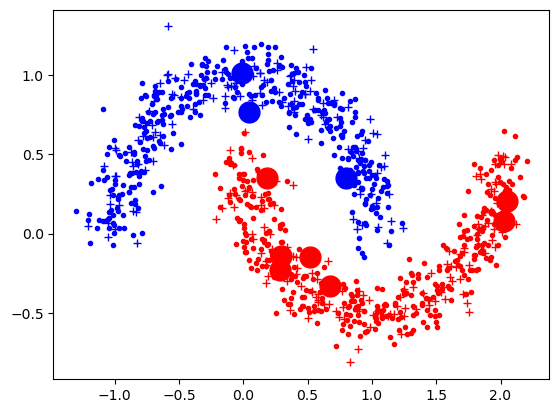

9600/9600 [==============================] - 18s 2ms/step


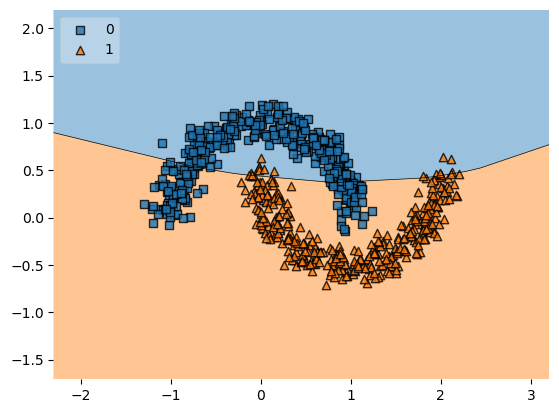

In [33]:
# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

# $\Pi$-Modèle

Nous allons maintenant tenter d'utiliser un 2nd algorithme semi-supervisé supposé être plus efficace, il s'agit de l'algorithme du $\Pi$-Modèle, donc la version détaillée est présentée ci-dessous (en VO).

<img src="https://drive.google.com/uc?id=13VhlBYwA6YIYGzKI81Jom_jTiuhOypEg">
<caption><center> Figure 2 : Pseudo-code de l'algorithme du $\Pi$-Modèle</center></caption>


Ci-dessous, la boucle d'entraînement détaillée est reprise et contient un squelette du code à réaliser pour implémenter le $\Pi$-Modèle.

**Travail à faire :** Complétez le squelette de l'algorithme du $\Pi$-Modèle pour pouvoir tester ce nouvel algorithme.

In [48]:
# Nombre d'epochs de l'apprentissage
epochs = 2000
# Nombre de données non-labellisées par batch
bs_unlab = 100
# Nombre de données labellisées par batch
bs_lab = 10
# Taille du batch
batch_size = bs_lab + bs_unlab
# Valeur initiale du paramètre de contrôle de l'importance de la régularisation non-supervisée
lambda_t = 0

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2moons()

# Nombre de batches par epochs
steps_per_epochs = int(np.floor(x_train_lab.shape[0]/bs_lab))
# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
# ICI ON A BESOIN DE DEUX FONCTIONS DE COUT :
# L'une pour la partie supervisée de la perte
loss_sup = keras.losses.BinaryCrossentropy()
# L'autre pour la partie non-supervisée de la perte
loss_unsup =  keras.losses.MeanSquaredError()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
val_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble non labellisé
indices_lab = np.arange(x_train_lab.shape[0])
# Indices de l'ensemble non labellisé
indices_unlab = np.arange(x_train_unlab.shape[0])

for epoch in range(epochs):

  for b in range(steps_per_epochs):

    # Les données d'un batch sont constituées de l'intégralité de nos données labellisées...
    x_batch_lab = x_train_lab[indices_lab[b*bs_lab:(b+1)*bs_lab]]
    y_batch_lab = y_train_lab[indices_lab[b*bs_lab:(b+1)*bs_lab]]
    # ... ainsi que de données non-labellisées !
    x_batch_unlab = x_train_unlab[indices[b*bs_unlab:(b+1)*bs_unlab]]

    # On forme notre batch en concaténant les données labellisées et non labellisées
    x_batch = np.concatenate((x_batch_lab, x_batch_unlab), axis=0)

    # On forme également un batch alternatif constitué des mêmes données bruitées
    # Le bruit ici sera simplement obtenu avec np.rand()
    # Attention à l'échelle du bruit !
    x_batch_noisy = x_batch + np.random.rand(x_batch.shape[0], x_batch.shape[1])*0.1

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)
      # Ne pas oublier de le faire également sur le 2e batch !
      y_pred_noisy = model(x_batch_noisy, training=True)

      # Calcul de la fonction de perte sur ce batch
      sup_term = loss_sup(np.expand_dims(y_batch_lab, 1), y_pred[0:bs_lab])
      unsup_term = loss_unsup(y_pred[bs_lab:], y_pred_noisy[bs_lab:])

      loss_value = sup_term + lambda_t * unsup_term

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(np.expand_dims(y_batch_lab, 1), y_pred[0:bs_lab])


  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()
  # Calcul de la précision sur l'ensemble de validation à la fin de l'epoch
  val_logits = model(x_test, training=False)
  val_acc_metric.update_state(np.expand_dims(y_test, 1), val_logits)
  val_acc = val_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Val Acc : %.4f" % (epoch, float(loss_value), float(train_acc), float(val_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_state()
  val_acc_metric.reset_state()

  # Mise à jour du paramètre de contrôle de l'importance de la régularisation non-supervisée
  # Il augmente progressivement !
  if lambda_t < 1:
    if epoch > 100:
      lambda_t = lambda_t + 0.01




Epoch    0 : Loss : 0.6667, Acc : 0.7000, Val Acc : 0.5120
Epoch    1 : Loss : 0.6452, Acc : 0.7000, Val Acc : 0.5120
Epoch    2 : Loss : 0.6252, Acc : 0.7000, Val Acc : 0.5120
Epoch    3 : Loss : 0.6069, Acc : 0.7000, Val Acc : 0.5120
Epoch    4 : Loss : 0.5899, Acc : 0.7000, Val Acc : 0.5120
Epoch    5 : Loss : 0.5743, Acc : 0.7000, Val Acc : 0.5120
Epoch    6 : Loss : 0.5597, Acc : 0.7000, Val Acc : 0.5120
Epoch    7 : Loss : 0.5463, Acc : 0.7000, Val Acc : 0.5520
Epoch    8 : Loss : 0.5337, Acc : 0.7000, Val Acc : 0.6400
Epoch    9 : Loss : 0.5219, Acc : 0.7000, Val Acc : 0.6560
Epoch   10 : Loss : 0.5106, Acc : 0.7000, Val Acc : 0.6840
Epoch   11 : Loss : 0.5000, Acc : 0.7000, Val Acc : 0.7240
Epoch   12 : Loss : 0.4899, Acc : 0.7000, Val Acc : 0.7520
Epoch   13 : Loss : 0.4803, Acc : 0.8000, Val Acc : 0.7680
Epoch   14 : Loss : 0.4710, Acc : 0.9000, Val Acc : 0.7760
Epoch   15 : Loss : 0.4619, Acc : 0.9000, Val Acc : 0.7880
Epoch   16 : Loss : 0.4532, Acc : 0.9000, Val Acc : 0.79

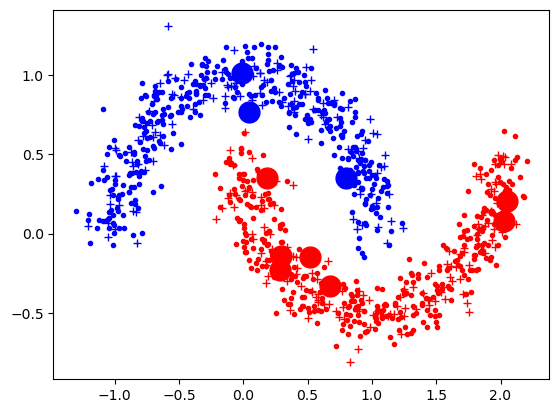

9600/9600 [==============================] - 18s 2ms/step


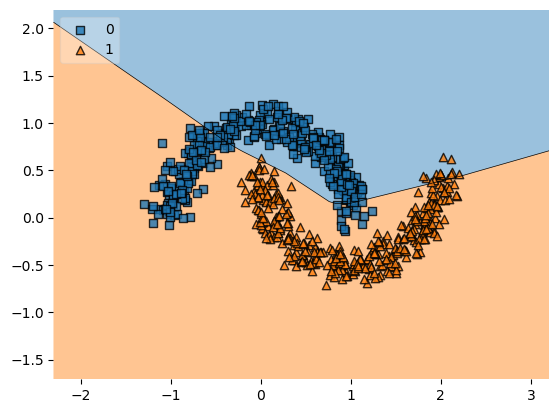

In [49]:
# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

# MNIST

Pour adapter l'algorithme du $\Pi$-modèle à MNIST, nous allons devoir remplacer le bruitage des données par de l'augmentation de données.

Commencez par remplir l'ImageDataGenerator (à vous de voir la doc) avec des transformations pertinentes. **Attention** cette étape est cruciale pour obtenir de bons résultats. Il faut intégrer les augmentations les plus fortes possibles, mais être certain qu'elles ne modifient pas le label du chiffre !

In [52]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

def generate_mnist_dataset(num_lab = 100):

  # Chargement et normalisation (entre 0 et 1) des données de la base de données MNIST
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = np.expand_dims(x_train.astype('float32') / 255., 3)
  x_test = np.expand_dims(x_test.astype('float32') / 255., 3)

  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=(x_train.shape[0]-num_lab)/x_train.shape[0], random_state=2)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test

x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_mnist_dataset()

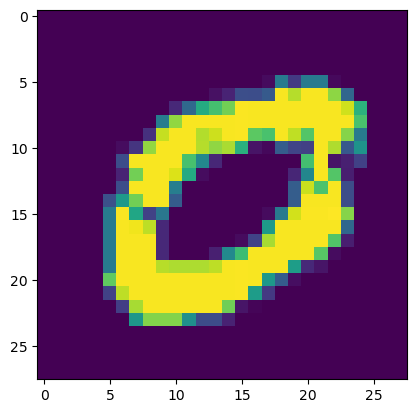

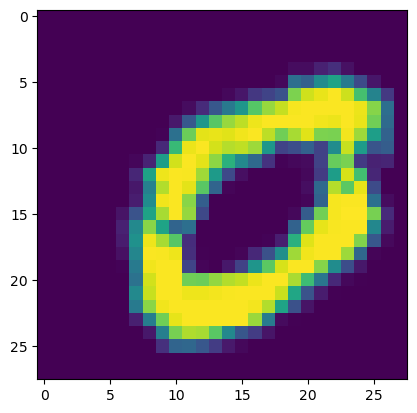

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    # A COMPLETER
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

x = x_train_lab[0:10]
plt.imshow(x[0, : ,: ,0])
plt.show()
x_aug = train_datagen.flow(x, shuffle=False, batch_size=10).__next__()
plt.imshow(x_aug[0, : ,: ,0])
plt.show()

**Travail à faire :** Reprenez maintenant le squelette précédent pour l'adapter à MNIST, en intégrant l'augmentation (à la place du bruitage des données). N'oubliez pas également de modifier les fonctions de coût !

In [56]:
# Nombre d'epochs de l'apprentissage
epochs = 2000
# Nombre de données non-labellisées par batch
bs_unlab = 100
# Nombre de données labellisées par batch
bs_lab = 10
# Taille du batch
batch_size = bs_lab + bs_unlab
# Valeur initiale du paramètre de contrôle de l'importance de la régularisation non-supervisée
lambda_t = 0

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_mnist_dataset()
model = create_model_mnist()

# Nombre de batches par epochs
steps_per_epochs = int(np.floor(x_train_lab.shape[0]/bs_lab))
# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
# ICI ON A BESOIN DE DEUX FONCTIONS DE COUT :
# L'une pour la partie supervisée de la perte
loss_sup = keras.losses.SparseCategoricalCrossentropy()
# L'autre pour la partie non-supervisée de la perte
loss_unsup =  keras.losses.MeanSquaredError()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
val_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble non labellisé
indices_lab = np.arange(x_train_lab.shape[0])
# Indices de l'ensemble non labellisé
indices_unlab = np.arange(x_train_unlab.shape[0])

for epoch in range(epochs):

  for b in range(steps_per_epochs):

    # Les données d'un batch sont constituées de l'intégralité de nos données labellisées...
    x_batch_lab = x_train_lab[indices_lab[b*bs_lab:(b+1)*bs_lab]]
    y_batch_lab = y_train_lab[indices_lab[b*bs_lab:(b+1)*bs_lab]]
    # ... ainsi que de données non-labellisées !
    x_batch_unlab = x_train_unlab[indices[b*bs_unlab:(b+1)*bs_unlab]]

    # On forme notre batch en concaténant les données labellisées et non labellisées
    x_batch = np.concatenate((x_batch_lab, x_batch_unlab), axis=0)

    # On forme également un batch alternatif constitué des mêmes données bruitées
    # Le bruit ici sera les données augmentées
    # Attention à l'échelle du bruit !
    x_batch_noisy = train_datagen.flow(x_batch, shuffle=False, batch_size=batch_size).__next__()

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)
      # Ne pas oublier de le faire également sur le 2e batch !
      y_pred_noisy = model(x_batch_noisy, training=True)

      # Calcul de la fonction de perte sur ce batch
      sup_term = loss_sup(np.expand_dims(y_batch_lab, 1), y_pred[0:bs_lab])
      unsup_term = loss_unsup(y_pred[bs_lab:], y_pred_noisy[bs_lab:])

      loss_value = sup_term + lambda_t * unsup_term

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(np.expand_dims(y_batch_lab, 1), y_pred[0:bs_lab])


  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()
  # Calcul de la précision sur l'ensemble de validation à la fin de l'epoch
  val_logits = model(x_test, training=False)
  val_acc_metric.update_state(np.expand_dims(y_test, 1), val_logits)
  val_acc = val_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Val Acc : %.4f" % (epoch, float(loss_value), float(train_acc), float(val_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_state()
  val_acc_metric.reset_state()

  # Mise à jour du paramètre de contrôle de l'importance de la régularisation non-supervisée
  # Il augmente progressivement !
  if lambda_t < 1:
    if epoch > 100:
      lambda_t = lambda_t + 0.01


Epoch    0 : Loss : 2.2348, Acc : 0.1400, Val Acc : 0.0980
Epoch    1 : Loss : 1.0994, Acc : 0.1340, Val Acc : 0.0942
Epoch    2 : Loss : 0.3196, Acc : 0.1330, Val Acc : 0.0986
Epoch    3 : Loss : 0.2463, Acc : 0.1340, Val Acc : 0.0998
Epoch    4 : Loss : 0.1226, Acc : 0.1350, Val Acc : 0.1004
Epoch    5 : Loss : 0.0826, Acc : 0.1350, Val Acc : 0.0998
Epoch    6 : Loss : 0.0514, Acc : 0.1350, Val Acc : 0.0996
Epoch    7 : Loss : 0.0008, Acc : 0.1350, Val Acc : 0.0996
Epoch    8 : Loss : 0.0326, Acc : 0.1350, Val Acc : 0.0996
Epoch    9 : Loss : 0.0084, Acc : 0.1350, Val Acc : 0.0999
Epoch   10 : Loss : 0.4374, Acc : 0.1350, Val Acc : 0.0998
Epoch   11 : Loss : 0.3942, Acc : 0.1350, Val Acc : 0.0999
Epoch   12 : Loss : 0.0451, Acc : 0.1350, Val Acc : 0.0997
Epoch   13 : Loss : 0.0030, Acc : 0.1350, Val Acc : 0.0996
Epoch   14 : Loss : 0.0001, Acc : 0.1350, Val Acc : 0.0996
Epoch   15 : Loss : 0.0001, Acc : 0.1350, Val Acc : 0.0997
Epoch   16 : Loss : 0.0007, Acc : 0.1350, Val Acc : 0.09

KeyboardInterrupt: 